# Modelo Preditivo para Doenças Cardiovasculares

<font color=red> fotinha do Insper </font>

## Ciência dos Dados

- Guilherme Rosada
- Jamesson Leandro Paiva Santos

______
<h2> Uma breve contextualização </h2>

<font color=red> Por uma pequena contextualização referente aos dados de números de Doenças Cardiovasculares no mundo e a necessidade de se fazer previsões de risco de doenças, tanto para os planos de saúde / seguradoras (para precificarem corretamente o valor dos planos/seguros), para os hospitais (para prepararem sua equipe e estrutura) e para os governos (a fim de criarem movimentos educativos ou de investirem em prevenção) </font>

Doenças cardiovasculares, de maneira geral, são distúrbios associados tanto ao funcionamento do coração quanto ao dos vasos sanguíneos, os quais atuam no sistema circulatório do corpo humano. A maior parte desses problemas são crônicos, isto é, desenvolvem-se ao longo dos anos, e, por isso, afetam majoritariamente grupos acima dos 40 anos de idade. A desenvoltura dessas doenças pode levar a sérias complicações de saúde, como risco de insuficiência cardíaca, acidente vascular cerebral (AVC) e infartos.

Os problemas cardíacos são mais frequentes em homens que em mulheres, ocorrendo principalmente na faixa etária acima de 50 anos. Os fatores que podem levar ao surgimento dessas doenças são diversos, mas pode-se destacar a existência de diabetes, hipertensão e altos índices de colesterol no sangue como agravantes, pois, geralmente, os distúrbios no coração ocorrem devido ao surgimento de obstáculos (acúmulo de gordura) nos vasos sanguíneos. Normalmente, esses fatores podem ser controlados quando se adotam hábitos de vida mais saudáveis (evitar bebidas alcóolicas e tabaco em uso recorrente, manter uma alimentação balanceada e uma constância na prática de atividades físicas, por exemplo). [*ref](https://www.paho.org/pt/topicos/doencas-cardiovasculares)

Entre as várias doenças cardiovasculares que existem, as mais frequentes são:
- Hipertensão (pressão alta)
- Infarto agudo ou miocárdio (mais conhecido como ataque cardíaco)
- Angina de peito (desconforto no peito, pode ser sintoma de algo mais grave)
- Doenças nas válvulas cardíacas
- Doenças cardíacas congênitas
- Endocardite (inflamação no revestimento interno do coração e das válvulas cardíacas)
- Arritmias cardíacas
- Miocardite
- Tumores no coração.

<h3>O que será trabalhado neste notebook</h3>

A plataforma Kaggle disponibiliza uma variedade imensa de *datasets* para competições de *data science* e *machine learning*. Para este trabalho, será utilizada o ['Cardiovascular Disease Dataset'](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) que contém alguns dados (que você verá logo no tópico a seguir) coletados no momento do exame de uma grande quantidade de pacientes. 

A partir desses dados, serão construído três modelos preditivos que respondam à seguinte pergunta: `a partir de um conjunto de informações sobre o paciente, ele terá ou não alguma doença cardiovascular?`

Esses modelos serão construidos utilizando a bilbioteca [scikit-learning](https://scikit-learn.org/stable/), que contém uma vasta quantidade de ferramentas de *machine learning* que ajudarão a fazer predições que auxiliem na formulação da resposta da pergunta acima. Ainda, esses modelos serão confrontados entre si quanto à acurácia obtida por cada um e será feita uma breve discussão sobre esses resultados.

Antes de começar, será necessário importar todas as bilbiotecas e módulos python necessários ao desenvolvimento do projeto.

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização gráfica dos dados
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Configurações de Exibição dos Gráficos:
sns.set_theme()
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})


# Módulos para os modelos preditivos
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

______
<h2> Tratamento da Base de Dados </h2>

A base dados contém algumas informações coletadas de vários pacientes no momento do exame. A seguir, estão descritas as informações originais contidas no [*dataset*](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset):

- `idade`: idade do paciente (em dias) $\rightarrow$ (será convertida para `anos`) 
- `altura`: altura do paciente (em centímetros) $\rightarrow$ (será convertida para `metros`)
- `peso`: peso ou massa corporal do paciente(em `kg`)
- `genero`: gênero, em que
    - 1: masculino
    - 2: feminino
- `pa_sist`: Pressão arterial sistólica - recurso de exame (em `mmHg`)
- `pa_diast`: Pressão arterial diastólica - recurso de exame (em `mmHg`)
- `colesterol`: nível de colesterol, em que:
    - 1: normal 
    - 2: acima do normal 
    - 3: muito acima normal
- `glicose`: Glicose - recurso de exame, em que
    - 1: normal
    - 2: acima do normal
    - 3: muito acima do normal
- `fumante`: classificação do paciente quanto ao hábito de fumar: 
    - 0: não fumante
    - 1: fumante
- `alcool`: classificação do paciente quanto ao hábito de Ingestão alcoólica de forma recorrente:
    - 0: não bebe
    - 1: bebe
- `a_fisica`: classificação do paciente quanto à prática de atividade física
    - 0: não praticante
    - 1: praticante
- `cardio`: Presença ou ausência de doença cardiovascular
    - 0: ausente
    - 1: presente
    
As variáveis acima encontram-se originalmente em inglês no *dataset*, porém, serão traduzidas pra o Português neste trabalho. 

A variável *target* será a `cardio`, pois é ela quem classifica o paciente como portador ou não de doença cardiovascular. Logo, ela é a variável dependente (pois seu valor dependerá do valor de todas as outras, denominadas independentes).

Além disso, é necessário fazer ainda uma série de manipulações no *dataset* antes de iniciar os trabalhos efetivamente. Dessa forma, algumas mudanças necessárias serão:

- traduzir os *labels*
- converter unidades da `idade` de dias para anos
- converter unidades da `altura` de centímetros para metros
- atribuir as categorias às variáveis categóricas (na descrição acima, note que alguns dados vêm classificados como 0 ou 1, por exemplo)
- verificar e filtrar *outliers* (dados que destoam completamente do padrão observados ou que são inconsistentes com a realidade)

In [2]:
# Leitura da base de dados:
dados = pd.read_csv('./data/cardio_data.csv', delimiter=';')

# Tradução dos labels para Português:
dados.columns = ['id', 'idade', 'genero', 'altura', 'peso', 'pa_sist', 'pa_diast',
                 'colesterol', 'glicose', 'fumante', 'alcool', 'a_fisica', 'cardio']

In [3]:
dados.head(2)

,id,idade,genero,altura,peso,pa_sist,pa_diast,colesterol,glicose,fumante,alcool,a_fisica,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [4]:
# Contando elementos vazios em cada coluna do dataframe
dados.isnull().sum()

id            0
idade         0
genero        0
altura        0
peso          0
pa_sist       0
pa_diast      0
colesterol    0
glicose       0
fumante       0
alcool        0
a_fisica      0
cardio        0
dtype: int64

In [5]:
# Converte idade de dias para anos, arredondado para o inteiro inferior
dados['idade'] = dados['idade']//365

# Converte altura de centímetros para metros
dados['altura'] = dados['altura']/100

In [6]:
# mostra o tipo de cada variável (coluna) do dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          70000 non-null  int64  
 1   idade       70000 non-null  int64  
 2   genero      70000 non-null  int64  
 3   altura      70000 non-null  float64
 4   peso        70000 non-null  float64
 5   pa_sist     70000 non-null  int64  
 6   pa_diast    70000 non-null  int64  
 7   colesterol  70000 non-null  int64  
 8   glicose     70000 non-null  int64  
 9   fumante     70000 non-null  int64  
 10  alcool      70000 non-null  int64  
 11  a_fisica    70000 non-null  int64  
 12  cardio      70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.9 MB


In [7]:
# Converte colunas necessárias para categóricas
dados['genero'] = dados['genero'].astype('category')
dados['colesterol'] = dados['colesterol'].astype('category')
dados['glicose'] = dados['glicose'].astype('category')
dados['fumante'] = dados['fumante'].astype('category')
dados['alcool'] = dados['alcool'].astype('category')
dados['a_fisica'] = dados['a_fisica'].astype('category')
dados['cardio'] = dados['cardio'].astype('category')

In [8]:
# Cria cópia do dataframe. Esta cópia será mantida para conservar os valores numéricos
# que categorizam as variáveis categóricas
dados_num = dados.copy()

In [9]:
# Atribuindo as categorias para cada variável categórica
dados['colesterol'].cat.categories = ['normal', 'acima do normal', 'muito acima do normal']
dados['glicose'].cat.categories = ['normal', 'acima do normal', 'muito acima do normal']
dados['fumante'].cat.categories = ['não fumante', 'fumante']
dados['alcool'].cat.categories = ['não bebe', 'bebe']
dados['a_fisica'].cat.categories = ['não praticante', 'praticante']
dados['genero'].cat.categories = ['masculino', 'feminino']
dados['cardio'].cat.categories = ['ausente', 'presente'] # variável target

In [10]:
# Atribuindo ordenação às variáveis categóricas ordinais
dados['colesterol'] = dados['colesterol'].cat.as_ordered()
dados['glicose'] = dados['glicose'].cat.as_ordered()

In [11]:
dados.head()

,id,idade,genero,altura,peso,pa_sist,pa_diast,colesterol,glicose,fumante,alcool,a_fisica,cardio
0,0,50,feminino,1.68,62.0,110,80,normal,normal,não fumante,não bebe,praticante,ausente
1,1,55,masculino,1.56,85.0,140,90,muito acima do normal,normal,não fumante,não bebe,praticante,presente
2,2,51,masculino,1.65,64.0,130,70,muito acima do normal,normal,não fumante,não bebe,não praticante,presente
3,3,48,feminino,1.69,82.0,150,100,normal,normal,não fumante,não bebe,praticante,presente
4,4,47,masculino,1.56,56.0,100,60,normal,normal,não fumante,não bebe,não praticante,ausente


### Remoção de Outliers

A última etapa a ser feita na limpeza do dataset corresponde à remoção de alguns outliers. 

Ao fazer uma rápida análise descritiva das variáveis numéricas, pode-se notar alguns dados que são inconsistentes com a realidade ou fogem totalmente do padrão observado na massa de dados. Vale lembrar, ainda, que a remoção dos outliers não afetará a base de dados de maneira significativa, haja vista a grande grande quantidade de dados (70000 linhas). 

Veja alguns exemplo:

#### Pressão Arterial (Sistólica e Diastólica)

In [12]:
# Média, valor mínimo e máximo de Pressão Sistólica
media_p_sist = dados['pa_sist'].mean()
minimo_p_sist = min(dados['pa_sist'])
maximo_p_sist = max(dados['pa_sist'])

# Exibe resultados
print('PRESSÃO SISTÓLICA')
print('-----------------')
print(f'Média (em mmHg): {media_p_sist:.2f} \nMínimo (em mmHg): {minimo_p_sist:.2f} \nMáximo (em mmHg): {maximo_p_sist:.2f}')

PRESSÃO SISTÓLICA
-----------------
Média (em mmHg): 128.82 
Mínimo (em mmHg): -150.00 
Máximo (em mmHg): 16020.00


Observando acima, há registro de valores negativos para pressão arterial sistólica, o que não faz sentido físico. Concomitantemente,  há valores totalmente fora da realidade, como evidenciado pela pressão Máxima (16020 mmHg - o que corresponde à aproximadamente *21 atmosferas de pressão!!*). 

O mesmo acontece com dados referentes à pressão diastólica:

In [13]:
# Média, valor mínimo e máximo de Pressão Sistólica
media_p_diast = dados['pa_diast'].mean()
minimo_p_diast = min(dados['pa_diast'])
maximo_p_diast = max(dados['pa_diast'])

# Exibe resultados
print('PRESSÃO DIASTÓLICA')
print('-----------------')
print(f'Média (em mmHg): {media_p_diast:.2f} \nMínimo (em mmHg): {minimo_p_diast:.2f} \nMáximo (em mmHg): {maximo_p_diast:.2f}')

PRESSÃO DIASTÓLICA
-----------------
Média (em mmHg): 96.63 
Mínimo (em mmHg): -70.00 
Máximo (em mmHg): 11000.00


É válido evidenciar, novamente, que esses dados foram colhidos no momento dos procedimentos médicos. Por não se conhecer as condições em que foram coletados e, devido ao procedimento não tomar os devidos cuidados quanto à qualidade dos registros, acredita-se que esses <i> outliers </i> tenham sido um erro de preenchimento, no momento de registrar a informação.

#### Massa corporal (peso) e Altura

Com os dados referentes à massa corporal (peso) e à altura, há alguns valores que fogem do padrão observado. Por exemplo, há registro de adultos com massa corporal de 10kg, 20kg, bem como de adultos com 55cm de altura. Para se ter um efeito de comparação desses valores, [o menor adulto humano do mundo](http://revistagalileu.globo.com/Revista/Common/0,,EMI296481-17770,00-CONHECA+O+MENOR+HOMEM+DO+MUNDO.html) já registrado tinha 54,6 cm e 17 kg, o que são casos raríssimos no planeta e, portanto, serão tratados como outliers e removidos do dataset, pois destoam completamente do comportamento da população.

Assim, aplicando uma remoção de todos esses outliers:

In [14]:
# Filtros do dataset
def filtra_dataset(df):
    cond_1 = (df['pa_sist'] > 24)  # limite mínimo da pa_sist
    cond_2 = (df['pa_sist'] < 240) # limite máximo da pa_sist

    cond_3 = (df['pa_diast'] > 30) # limite mínimo da pa_diast
    cond_4 = (df['pa_diast'] < 250)# limite máximo da pa_diast 

    cond_5 = (df['altura'] > 0.7) # limite mínimo da altura
    cond_6 = (df['peso'] > 30)    # limite mínimo do peso

    # Unindo em um único filtro
    condicoes = cond_1 & cond_2 & cond_3 & cond_4 & cond_5 & cond_6 

    # Atualiza dataset
    df = df.loc[condicoes]
    return df

# Atualizando
dados = filtra_dataset(dados)
dados_num = filtra_dataset(dados_num)

In [15]:
# remove coluna 'id' (não tem significado para essa análise)
dados = dados.drop(['id'], axis=1)
dados_num = dados_num.drop(['id'], axis=1)

In [16]:
# Tamanho atualizado do dataset
dados.shape

(68745, 12)

___
<h2 class="analise_exploratoria"> Análise Exploratória dos dados </h2>

<h3>Análise descritiva das variáveis numéricas </h3>

In [17]:
# Função que recebe uma lista de colunas e o dataframe corresponde e devolve
# um novo dataframe com uma descrição estatística correspondente à cada coluna
def descreve_variavel(df, lista_colunas):
    df_descrito = pd.DataFrame(df[lista_colunas]).describe()
    df_descrito.index = ['Quantidade total', 
                         'Média', 
                         'Desvio Padrão', 
                         'Valor mínimo', 
                         'Quartil (25%)', 
                         'Quartil (50%)', 
                         'Quartil (75%)', 
                         'Valor máximo']
    return df_descrito

In [18]:
# Descrição estatística das variáveis numéricas
descreve_variavel(dados, ['idade', 'peso', 'altura', 'pa_sist', 'pa_diast']).round(3)

,idade,peso,altura,pa_sist,pa_diast
Quantidade total,68745.000,68745.000,68745.000,68745.000,68745.000
Média,52.829,74.129,1.644,126.606,81.379
Desvio Padrão,6.769,14.321,0.081,16.727,9.669
Valor mínimo,29.000,31.000,0.710,60.000,40.000
Quartil (25%),48.000,65.000,1.590,120.000,80.000
Quartil (50%),53.000,72.000,1.650,120.000,80.000
Quartil (75%),58.000,82.000,1.700,140.000,90.000
Valor máximo,64.000,200.000,2.500,230.000,190.000


A tabela acima fornece os principais valores descritivos estatísticos (média, desvio padrão, quartis, valores máximo e mínimo) referente a cada uma das variáveis numéricas. Veja, logo abaixo, como se dá a distribuição de cada uma dessas variáveis.

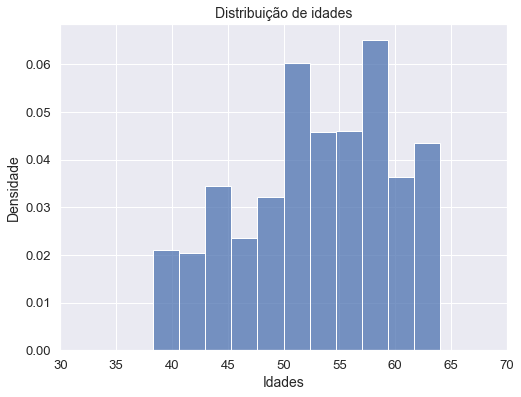

In [19]:
# Densidade de distribuição das idades

plt.figure(figsize=(8,6))
sns.histplot(dados['idade'], stat='density', bins=15)
plt.ylabel('Densidade', fontsize=14)
plt.title('Distribuição de idades', fontsize=14)
plt.xlabel('Idades', fontsize=14)
plt.xlim(30, 70)
plt.show()

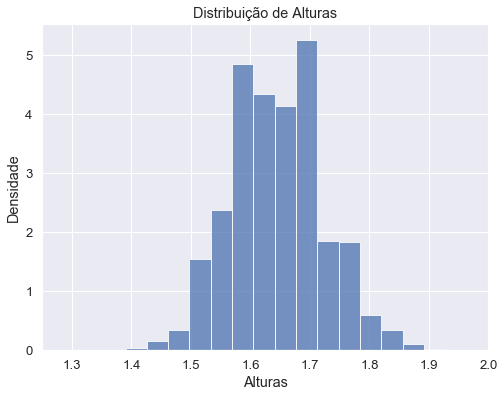

In [20]:
# Densidade de distribuição da altura

plt.figure(figsize=(8,6))
sns.histplot(dados['altura'], stat = 'density', bins=50)
plt.ylabel('Densidade')
plt.title('Distribuição de Alturas')
plt.xlabel('Alturas')
plt.xlim (1.25, 2.00)
plt.show()

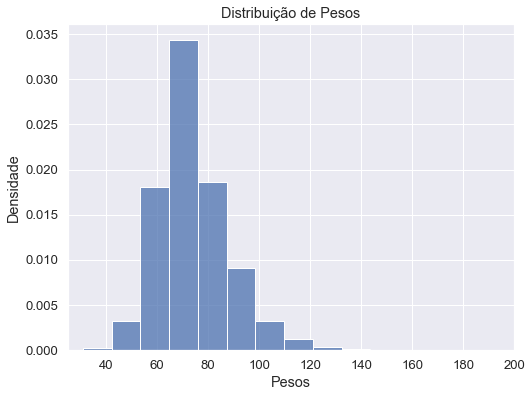

In [21]:
# Distribuição de pesos

plt.figure(figsize=(8,6))
sns.histplot(dados['peso'], stat='density', bins=15)
plt.ylabel('Densidade')
plt.title('Distribuição de Pesos')
plt.xlabel('Pesos')
plt.xlim(25,200)
plt.show()

<h3>Análise das Variáveis Quantitativas </h3>

In [22]:
# Separando os dados entre Cardíacos e Saudáveis para Análise de Dados
cardiacos = dados.loc[dados.cardio == 'presente',:]
saudaveis = dados.loc[dados.cardio == 'ausente',:]

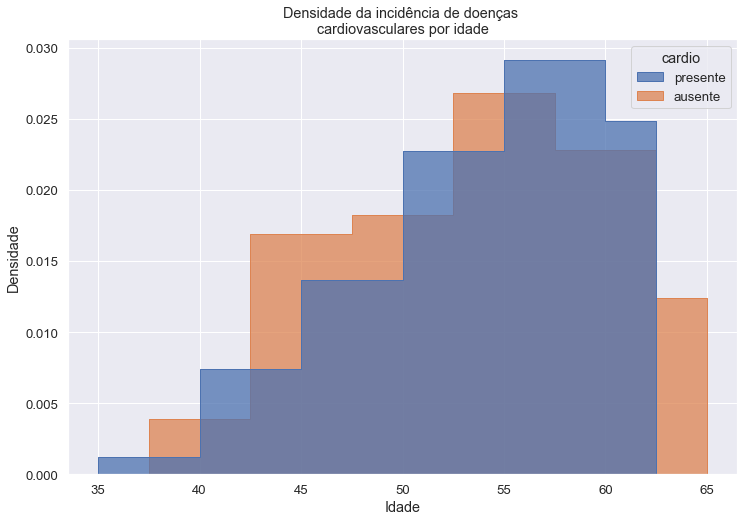

In [23]:
faixa_idade = np.arange(35, 70, 5)
plt.figure(figsize=(12,8))

# Plota hitograma de idade em função da categoria cardio
sns.histplot(dados, x='idade', hue='cardio', hue_order=['presente', 'ausente'], multiple='dodge',
             stat='density', bins=faixa_idade, element='step' )
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.title('Densidade da incidência de doenças \ncardiovasculares por idade')
plt.fontsize=14
plt.show()


Percebe-se que a maioria dos cardíacos estão na faixa de 50 a 60 anos.

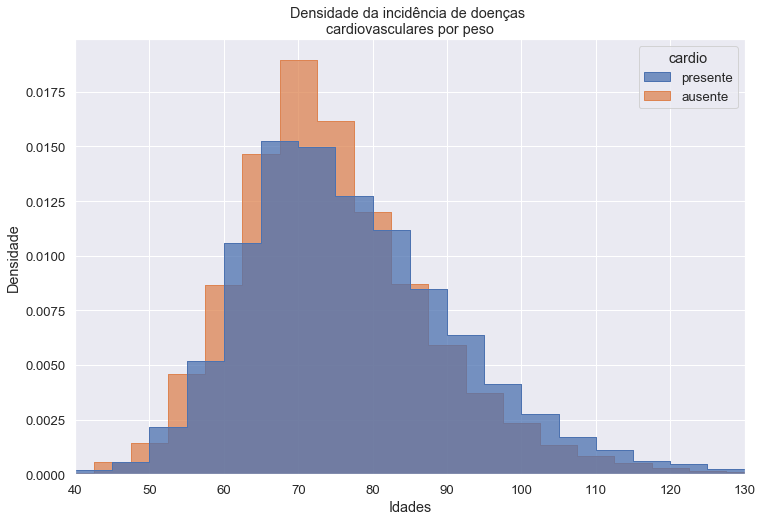

In [24]:
faixa_peso = np.arange(30, 150, 5)
plt.figure(figsize=(12,8))

# Plota histograma de peso em função da categoria cardio
sns.histplot(dados, x='peso', hue='cardio', hue_order=['presente', 'ausente'], multiple='dodge',
             bins=faixa_peso, stat='density', element='step') #multiple='dodge'
plt.ylabel('Densidade')
plt.title('Distribuição de Pesos')
plt.xlabel('Idades')

plt.xlim((40, 130))
plt.title('Densidade da incidência de doenças \ncardiovasculares por peso');

Percebe-se que a maioria dos cardíacos estão têm por volta de 70 kg, mas com distribuição assimetrica para a direita.

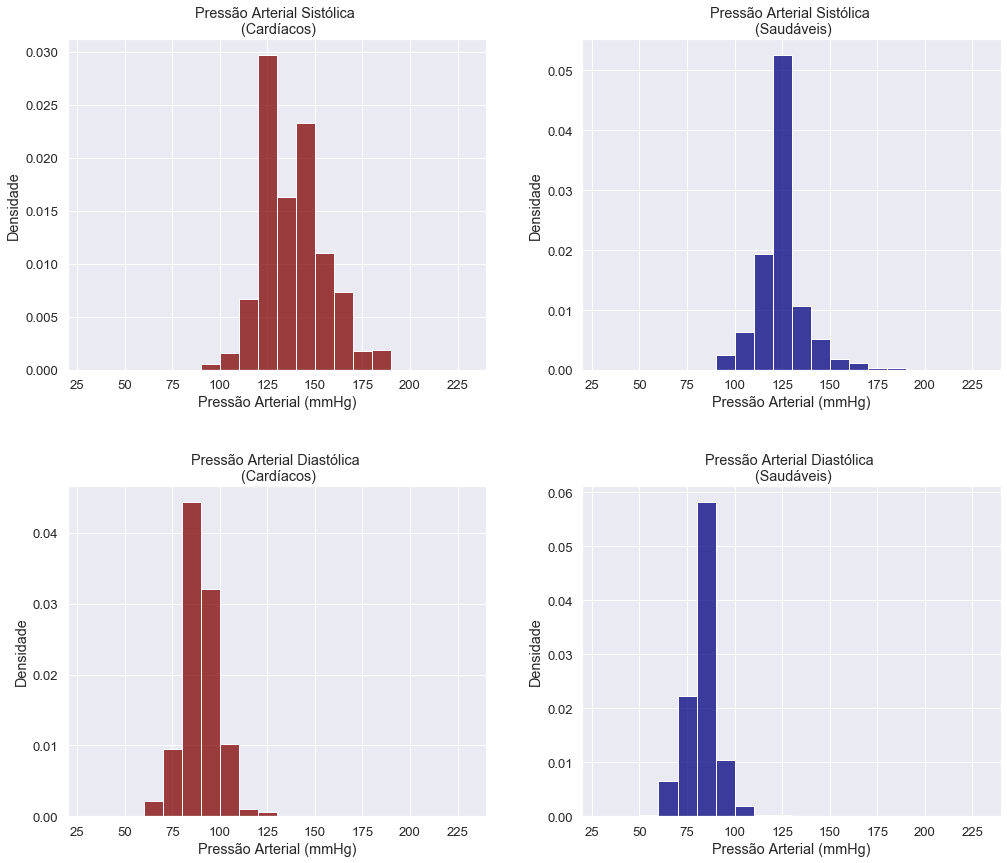

In [47]:
plt.figure(figsize=(15,13))

plt.subplot(2,2,1)
pa_sist_bins = np.arange(90, 200, 10)
# sns.distplot(cardiacos['pa_sist'], bins=pa_sist_bins, color='maroon')
sns.histplot(cardiacos, x='pa_sist', color='maroon', bins=pa_sist_bins, stat='density') #multiple='dodge'
plt.xlim(20, 240)
plt.title('Pressão Arterial Sistólica \n (Cardíacos)')
plt.xlabel('Pressão Arterial (mmHg)')
plt.ylabel('Densidade')

plt.subplot(2,2,2)
pa_diast_bins = np.arange(90, 200, 10)
# sns.distplot(saudaveis['pa_sist'], bins=pa_diast_bins, color='navy')
sns.histplot(saudaveis, x='pa_sist', color='navy', bins=pa_diast_bins, stat='density') #multiple='dodge'
plt.xlim(20, 240)
plt.title('Pressão Arterial Sistólica \n (Saudáveis)')
plt.xlabel('Pressão Arterial (mmHg)')
plt.ylabel('Densidade')

plt.subplot(2,2,3)
pa_sist_bins = np.arange(40, 140, 10)
# sns.distplot(cardiacos['pa_diast'], bins=pa_sist_bins, color='lightcoral')
sns.histplot(cardiacos, x='pa_diast', color='maroon', bins=pa_sist_bins, stat='density') #multiple='dodge'
plt.xlim(20, 240)
plt.title('Pressão Arterial Diastólica \n (Cardíacos)')
plt.xlabel('Pressão Arterial (mmHg)')
plt.ylabel('Densidade')

plt.subplot(2,2,4)
pa_diast_bins = np.arange(40, 140, 10)
# sns.distplot(saudaveis['pa_diast'], bins=pa_diast_bins, color='slateblue')
sns.histplot(saudaveis, x='pa_diast', color='navy', bins=pa_diast_bins, stat='density') #multiple='dodge'
plt.xlim(20, 240)
plt.title('Pressão Arterial Diastólica \n (Saudáveis)')
plt.xlabel('Pressão Arterial (mmHg)')
plt.ylabel('Densidade')

plt.tight_layout(pad=3.0)
plt.show()

<h3> Análise das Variáveis Qualitativas </h3>

<font color=red> Fazer gráficos Interativos </font>

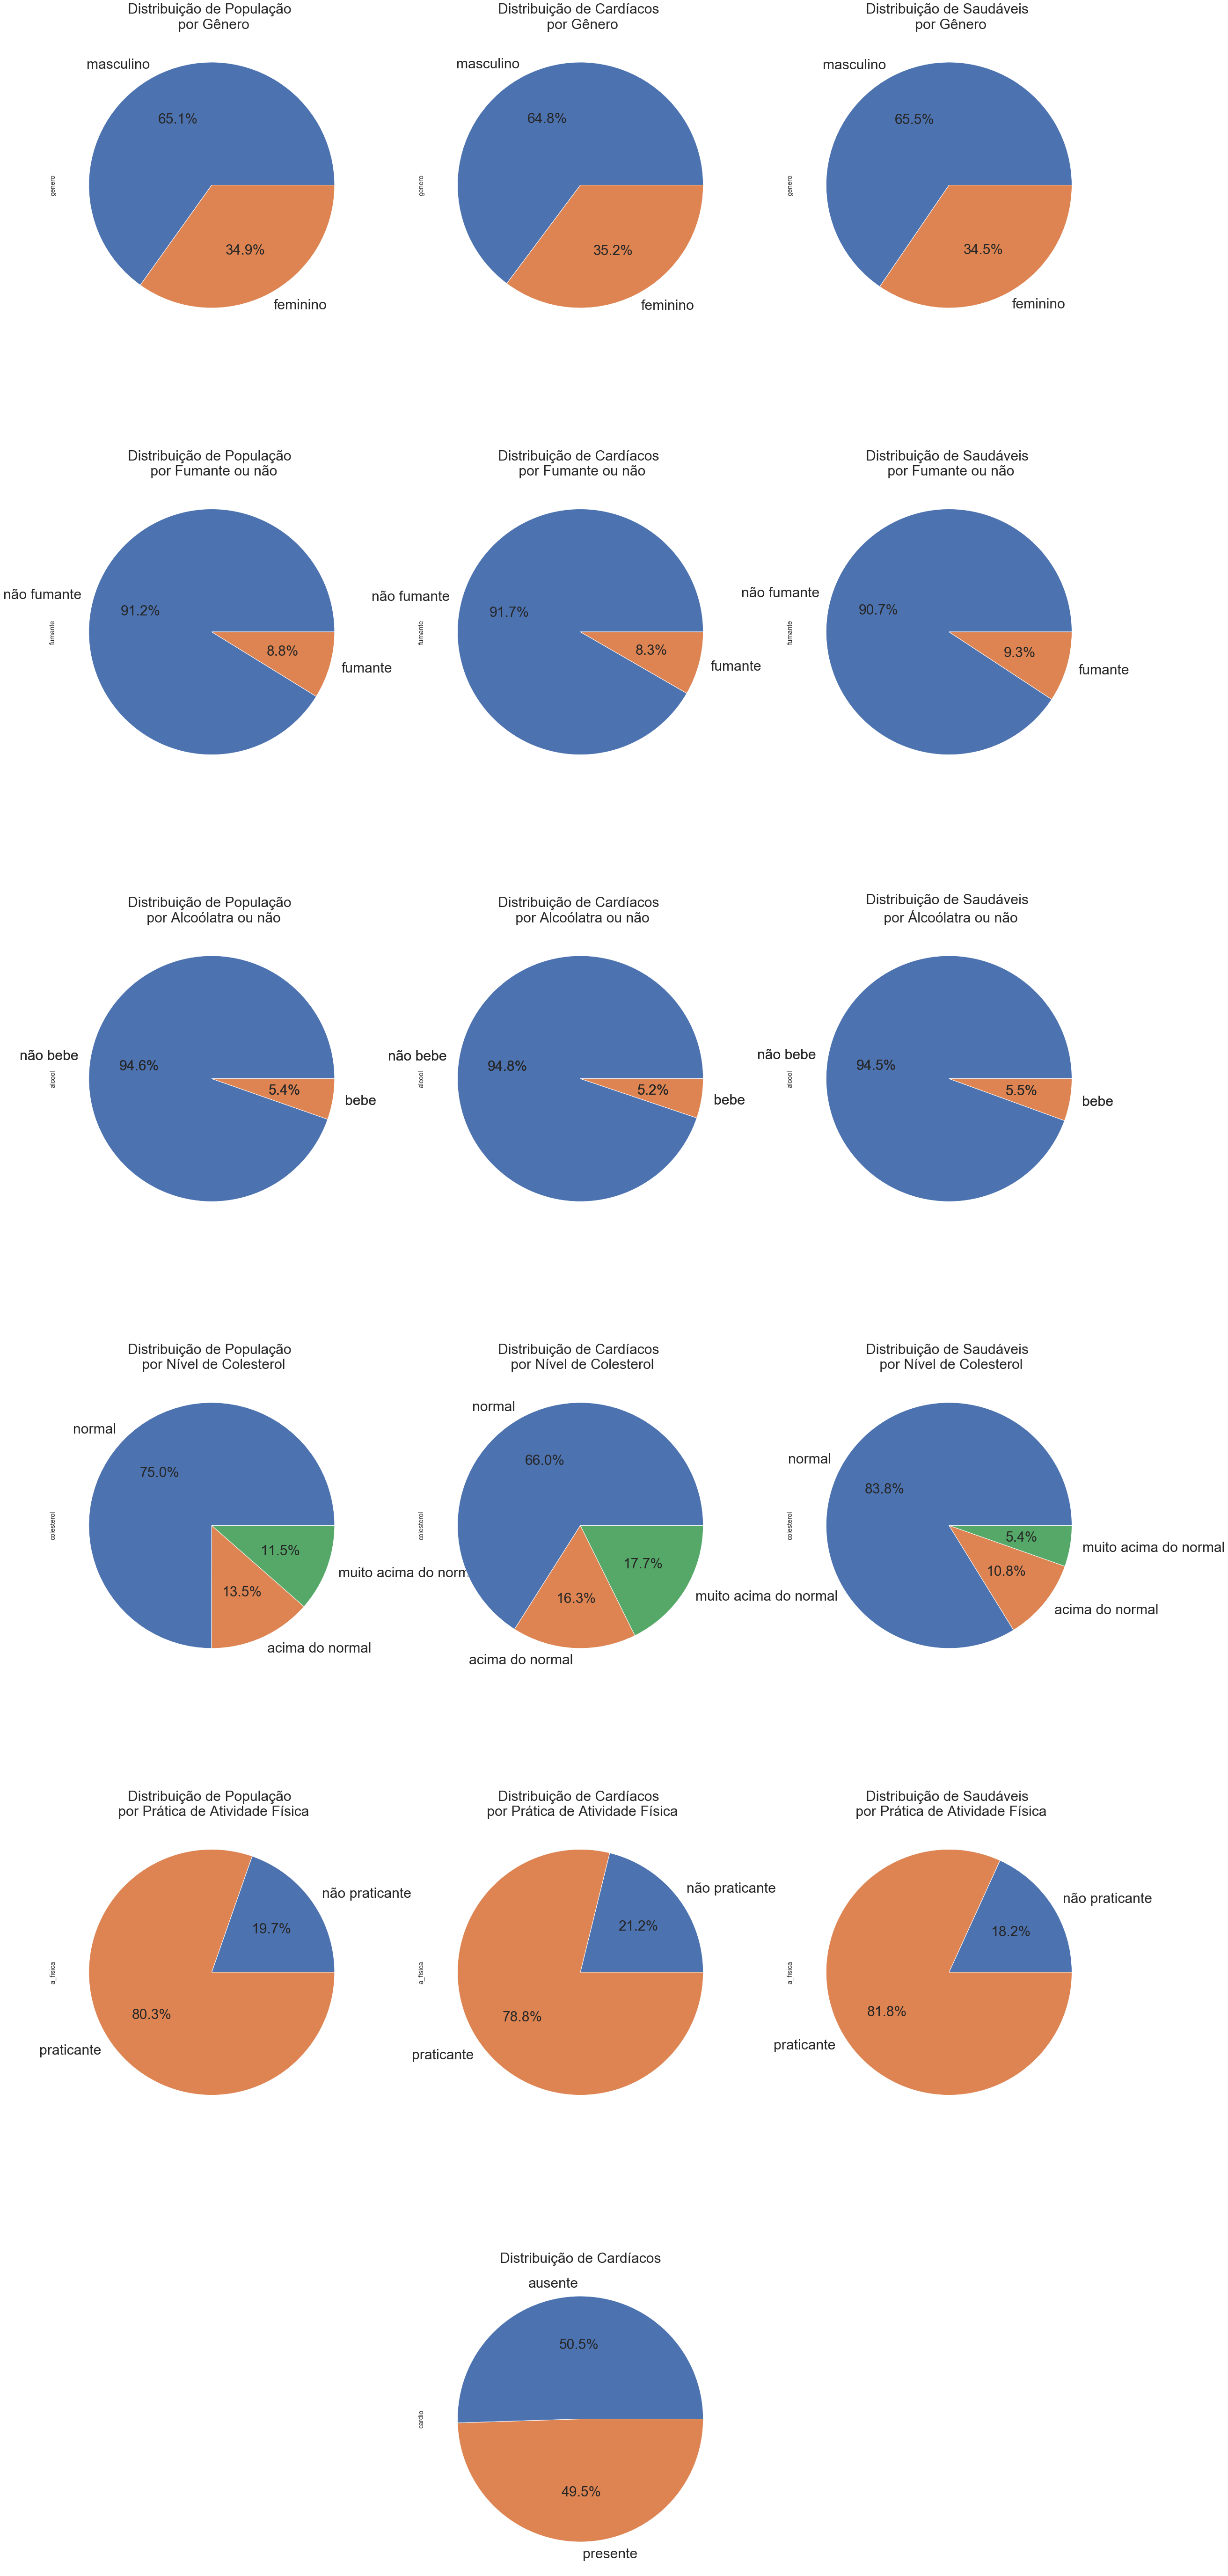

In [26]:
plt.figure(figsize=(40,120))

# Gênero
plt.subplot(7,3,1)
dados.genero.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de População \n por Gênero', fontsize=30)

plt.subplot(7,3,2)
cardiacos.genero.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de Cardíacos \n por Gênero', fontsize=30)

plt.subplot(7,3,3)
saudaveis.genero.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de Saudáveis \n por Gênero', fontsize=30)

# Fumantes
plt.subplot(7,3,4)
dados.fumante.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de População \n por Fumante ou não', fontsize=30)

plt.subplot(7,3,5)
cardiacos.fumante.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de Cardíacos \n por Fumante ou não', fontsize=30)

plt.subplot(7,3,6)
saudaveis.fumante.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de Saudáveis \n por Fumante ou não', fontsize=30)


# Alcóolicos
plt.subplot(7,3,7)
dados.alcool.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de População \n por Alcoólatra ou não', fontsize=30)

plt.subplot(7,3,8)
cardiacos.alcool.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de Cardíacos \n por Alcoólatra ou não', fontsize=30)

plt.subplot(7,3,9)
saudaveis.alcool.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de Saudáveis \n por Álcoólatra ou não', fontsize=30)


# Glicose
plt.subplot(7,3,7)
dados.alcool.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de População \n por Alcoólatra ou não', fontsize=30)

plt.subplot(7,3,8)
cardiacos.alcool.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de Cardíacos \n por Alcoólatra ou não', fontsize=30)

plt.subplot(7,3,9)
saudaveis.alcool.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de Saudáveis \n por Álcoólatra ou não', fontsize=30)

# Colesterol
plt.subplot(7,3,10)
dados.colesterol.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de População \n por Nível de Colesterol', fontsize=30)

plt.subplot(7,3,11)
cardiacos.colesterol.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de Cardíacos \n por Nível de Colesterol', fontsize=30)

plt.subplot(7,3,12)
saudaveis.colesterol.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de Saudáveis \n por Nível de Colesterol', fontsize=30)

# Atividade Física
plt.subplot(7,3,13)
dados.a_fisica.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de População \n por Prática de Atividade Física', fontsize=30)

plt.subplot(7,3,14)
cardiacos.a_fisica.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de Cardíacos \n por Prática de Atividade Física', fontsize=30)

plt.subplot(7,3,15)
saudaveis.a_fisica.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de Saudáveis \n por Prática de Atividade Física', fontsize=30)

# Cardíacos x Saudáveis
plt.subplot(7,3,17)
dados.cardio.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição de Cardíacos', fontsize=30)


plt.fontsize=14
plt.show()


### Discussão:

Percebe-se que, no geral, os dados estão igualmente distribuídos entre _cardíacos_ e _saudáveis_ , não havendo grandes diferenças entre eles, exceto pelo _nível de colesterol_ , o que já pode se mostrar como um possível indicador para alertar possíveis cardíacos.

___
# Modelos Preditivos

## 1. Árvore de Decisão (Decision Tree Classifier)

### O que é uma arvore de decisão?

Você já deve ter visto alguns fluxogramas ou esquemas gráficos que ligam uma série de decisões que são tomadas sequencialmente, sempre dependendo da decisão tomada anteriormente, como o do exemplo abaixo:


<img src="./image/fluxograma_pp.png" width="400" alt="fluxograma">

Extraída de: [UFES](https://etica.ufes.br/fluxograma) 

As Árvores de Decisão são muito parecidas com o esquema acima. Elas funcionam como um mapa de todas os possíveis resultados e probabilidades de acordo com as *features* que se apresentam relacionadas ao problema. Em *machine learning*, as árvores de decisão consistem em métodos de aprendizagem supervisionado, podendo ser utilizadas em tarefas de classificação (quando a variável *target* é categórica) ou regressão (quando a variável *target* é numérica).

Para compreender melhor a árvore de decisão, veja alguns conceitos:

- **Nó raiz (ou nó pai)**: É o nó de maior importância (Ganho, em termos matemáticos \$-$ que será visto em breve) a partir do qual os dados passam a ser subdivididos em outros sub-nós.
- **Nó de decisão**: São as subamostras que se dividem em mais subamostras ou sub-nós (não são o término de uma remificação).
- **Nó filho (ou folha)**: São as subamostras em que não ocorrem mais subdivisões

A figura a seguir deixa mais claro os conceitos acima.

<img src="./image/decision-tree-classification-algorithm.png" width="400" alt="arvore de decisao">


Fonte: [JavaTpoint](https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm)


O nó verde representa o nó pai, os nós azuis representam os nós de decisão e os nós em cor de rosa representam os nós filhos (ou folhas)

### Como construir uma árvore de decisão?

Como qualquer modelo de *machine learning*, é necessário entender um pouco do processo matemárico que o embasa. A árvore de decisão que será construida nesse modelo será utilizada para classificação. Para esse caso, há 2 critérios de divisão mais conhecidos: *Entropia* e *Índice de Gini*.

**A) Entropia**

A Entropia é mais conhecida por medir o "grau de desordem" de um sistema. Nas árvores de decisão, a entropia mede a falta de *homogeneidade* de uma amostra, isto é, mede a impureza dos dados relacionados à sua classificação. Em outras palavras, a entropia faz o controle de como a Árvore decide a divisão dos dados.

O cálculo da entropia ($S$) pode ser feito conforme a equação:

$$Entropia (S) = \sum_{i=1}^n-p_i \cdot \log_{2}p_i$$

em que:
- $S$ é um conjunto de dados com $n$ classes diferentes
- $p_i$ é a fração de dados de $S$ que pertencem à classe $i$

A partir dos cálculos de Entropia, calcula-se o Ganho de informação que, em outras palavras, pode ser entendido como o grau de importância de um dado atributo. Assim, o ganho de um dado atributo $A$ de um conjunto de dados $S$ é dado por:

$$Ganho(S, A) = Entropia(S) - \sum_{v\in Valores(A)}\frac{\vert S_v \vert}{\vert S \vert}Entropia(S_v)$$

em que 
- $Valores(A)$ representa os possíveis valores de $A$
- $v$ é um elemento de $Valores(A)$
- $S_v$ é o subconjunto de $S$ quando $x=A$

**B) Índice de Gini**

O Índice de Gini é uma expressão matemática que calcula a impureza de um nó (grau de heterogeneidade dos dados) e é determinado por:

$$Gini = 1 - \sum_{i=1}^n p_i^2$$

em que:
- $p_i$ é a fração de cada classe em cada nó
- $n$ é o número de classes

> *Quando, nas árvores de classificação com partições binárias, se utiliza o critério de Gini tende-se a isolar num ramo os registros que representam a classe mais freqüente. Quando se utiliza a entropia, balanceia-se o número de registros em cada ramo.* (SILVA, Luiza Maria Oliveira da, p.44, 2005. Disponível [aqui](https://www.maxwell.vrac.puc-rio.br/colecao.php?strSecao=resultado&nrSeq=7587@1&msg=28#))

Neste projeto, a construção da Árvore de Decisão será feita com o critério da Entropia, tendo em vista o balanço de registros que esse método gera para cada ramo da árvore.

### Vantagens das Árvores de Decisão

- **Fácil compreensão**: sua representação gráfica ajuda a tornar o entendimento mais intuitivo, ainda que a pessoa não tenha habilidades técnicas na área.
- **Abrangência aos tipos de variáveis**: esse modelo é capaz de trabalhar tanto com variáveis numéricas como com categóricas.
- **Fácil manipulação com dados**: além de não exigir grandes manutenções na base de dados (consegue, até certo ponto, não ser influenciada por *outliers* ou valores faltantes), também ajuda na identificação das variáveis mais relevantes e significativas na predição da variável *target*.

### Desvantagens das Árvores de Decisão

- ***Overfitting***: é uma das dificuldades que se deve ter em mente ao trabalhar com Árvores de Decisão. O modelo pode se ajustar demais com facilidade aos dados de treino, tornando-o inviável como um classificador ao validar com outros conjuntos de dados.

### Implementação do modelo

A aplicação da árvore decisão será por meio da biblioteca do scikit-learn [(vide documentação)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) (a importação encontra-se nas primeiras células deste documento). Para implementar o modelo, cria-se o modelo com *DecisionTreeClassifier()* e aplica o método *fit()*, que recebe os dados de treino e ajusta os dados para fazer classificações de quaisquer *datasets* no mesmo formato.

No objeto *DecisionTreeClassifier()*, há alguns argumentos importantes:

- **criterion**: é o critério com o qual a árvore será construída (*Gini* ou Entropia).
- **max_depth**: é a profundidade máxima da árvore. Esse argumento limita o tamanho da árvore, e deve ser utilizado com cautela, pois grande profundidade pode levar a *overfitting* e pequena demais pode tirar a capacidade do modelo de generalizar outros conjuntos de dados para classificar.



### Preparando a base de dados para implementação

Para a implementação de fato do modelo, é necessário dividir a base de dados em dois grupos:

- **Dados de treino**: esses dados serão aqueles utilizados para montar de fato o modelo, isto é, são os dados que ensinam ao computador como se comporta cada variável em relação a variável *target* e o quanto e como cada uma influenciará uma possível classificação.
- **Dados de teste**: esses dados serão aqueles utilizados para testar a precisão do modelo, isto é, são dados não iguais aos de treino para verificar o quão preciso está o modelo nas suas classificações.

A divisão desses dados será feita com o módulo *train_test_split()* do módulo *model_selection*, da biblioteca do *sckikit-learning* (a importação encontra-se nas primeiras células deste documento). Esse módulo recebe os dados de treino (sem a coluna da variável *target*) e os dados *target*, ou seja, recebe os dados do "eixo x" e do "eixo y", além de passar a fração com que deve ser feita a divisão (em geral, se utiliza de 20 a 30% dos dados para teste). Aqui, será utilizado 20% dos dados para teste.

As células abaixo mostram as etapas de preparação dos dados e implementação da árvore de decisão.

In [27]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# dados.loc[:, ['genero']] = encoder.fit_transform(dados.loc[:, ['genero']])
# dados.loc[:, ['colesterol']] = encoder.fit_transform(dados.loc[:, ['colesterol']])
# dados.loc[:, ['alcool']] = encoder.fit_transform(dados.loc[:, ['alcool']])
# dados.loc[:, ['a_fisica']] = encoder.fit_transform(dados.loc[:, ['a_fisica']])
# dados.loc[:, ['fumante']] = encoder.fit_transform(dados.loc[:, ['fumante']])
# dados.loc[:, ['glicose']] = encoder.fit_transform(dados.loc[:, ['glicose']])

In [28]:
target = 'cardio'

# Series com a variável target
dados_target = dados_num[target]

# Remove target
dados_num = dados_num.drop([target], axis=1)

# Separando os dados de treino e teste
dados_treino, dados_teste, target_treino, target_teste = train_test_split(dados_num, 
                                                                          dados_target, 
                                                                          test_size=0.2, 
                                                                          random_state=0)

In [29]:
# Cria árvore de decisão
arvore_decisao = DecisionTreeClassifier(criterion='entropy')

# Treina o modelo
modelo = arvore_decisao.fit(dados_treino, target_treino)

# Calcula acurácia do modelo
acuracia = arvore_decisao.score(dados_teste, target_teste) * 100
print(f'Acurácia do modelo: {acuracia}')

Acurácia do modelo: 63.98283511528111


In [30]:
# Profundidade da árvore gerada
print(f'Profundidade da árvore: {modelo.tree_.max_depth}')

Profundidade da árvore: 47


### Verificando resultado com Matriz de Confusão

A matriz de confusão é uma maneira de se avaliar o desempenho do modelo. Ela compara, por meio de uma tabela, os dados verdadeiros com os valores previstos para cada um. Assim, ela mostra 4 possibilidades:

- `Verdadeiro positivo`: é quando uma condição é positiva e a previsão também é positiva. No caso deste modelo, é quando o valor verdadeiro é 1 e o previsto também é 1. Ele é exibido no canto superior esquerdo.
- `Verdadeiro negativo`: é quando uma condição é negativa e a previsão também é negativa. No caso deste modelo, é quando o valor negativo é 0 e o previsto também é 0. Ele é exibido no canto inferior direito.
- `Falso positivo` (erro tipo I): é quando o modelo prevê a condição positiva (1) quando o valor verdadeiro é negativo (0)
- `Falso negativo` (erro tipo II): é quando o modelo prevê a condição negativa (0) quando o valor verdadeiro é positivo (1)

A biblioteca do scikit-learn já contém um módulo que plota essa matriz (a importação encontra-se nas primeiras células deste notebook). Veja a seguir a sua implementação:


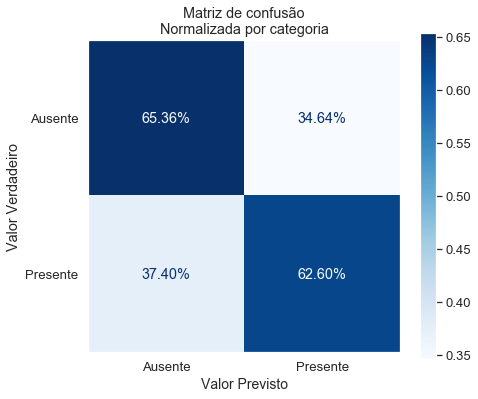

In [31]:
# Figura para plotagem do gráfico
fig, ax = plt.subplots(figsize=(7, 6))
# Cria e plota matriz de confusão
plot_confusion_matrix(modelo, dados_teste, target_teste, 
                      normalize='true', display_labels=['Ausente', 'Presente'], 
                      cmap=plt.cm.Blues, ax=ax, values_format='.2%')
plt.xlabel("Valor Previsto", fontsize=14)
plt.ylabel("Valor Verdadeiro")
plt.title("Matriz de confusão\nNormalizada por categoria")
plt.grid(False)


A matriz de confusão acima traz os resultados <u> normalizados por cada categoria</u>, isto é:

- em relação aos dados cujo valor verdadeiro é *ausente*, 65.46% destes foram classificados como ausente (verdadeiro negativo), enqaunto os outros 34.54% foram classificados pelo modelo como presente (falso positivo).
- em relação aos dados cujo valor verdadeiro é *presente*, cerca de 62.73% foram classificados como *presente* (verdadeiro positivo), enquanto que os outros 37.27% foram classificados como ausente (falso negativo)


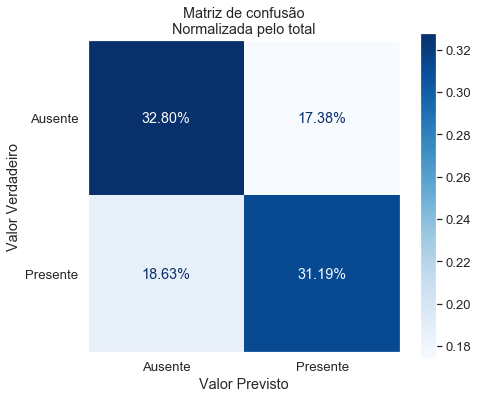

In [32]:
# Figura para plotagem do gráfico
fig, ax = plt.subplots(figsize=(7, 6))

# Cria e plota matriz de confusão
plot_confusion_matrix(modelo, dados_teste, target_teste, 
                      normalize='all', display_labels=['Ausente', 'Presente'], 
                      cmap=plt.cm.Blues, ax=ax, values_format='.2%')
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Verdadeiro")
plt.title("Matriz de confusão\nNormalizada pelo total")
plt.grid(False)

A matriz de confusão acima traz os resultados <u> normalizados pelo total</u> , isto é, mostra a porcentagem de coincidências entre os valores verdadeiros e a classificação efetuada pelo modelo. A soma entre os verdadeiros positivo e negativo resulta na acurácia de aproximadamente 64%.

### Discussão
Tratando-se de um modelo voltado para classificar possíveis portadores de doenças cardiovasculares a partir de algumas de suas características, o ideal seria ampliar ainda mais sua acurácia, seja buscando novas features sobre os indivíduos, testando outras técnicas de machine learning, buscando mais aperfeiçoamentos para as técnicas aqui empregadas ou, de forma externa, buscando uma fonte de dados de melhor qualidade.

Uma das maneiras de tentar melhorar o modelo da árvore de decisão e diminuir as chances de overfitting é limitando o seu crescimento. Quanto maior a quantidade de variáveis envolvidas, maior fica o seu tamanho e também maior as chances daquele modelo se ajustar demais aos dados. Assim, é possível tentar generalizar mais o modelo limitando seu crescimento, utilizando em sua construção as variáveis que mais influenciam na target e excluindo as demais.

Como foi visto, a árvore anterior tinha profundidade de 47. O quanto é possível melhorar sua performance reduzindo sua profundidade máxima? Veja uma implementação na qual se gera dados de treino a partir da mesma base, treina o modelo e calcula sua acurácia para até 20.

In [33]:
def cria_arvore(X_dados, Y_dados, profundidade):
    # Separando os dados de treino e teste
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_dados, 
                                                            Y_dados, 
                                                            test_size=0.2, 
                                                            random_state=0)
    
    # Cria árvore de decisão
    nova_arvore = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=n)
    # Treina o modelo
    novo_modelo = nova_arvore.fit(X_treino, Y_treino)
    # Calcula acurácia do modelo
    acc = nova_arvore.score(X_teste, Y_teste) * 100
    print(f'Profundidade (max_depth) = {profundidade:2.0f} | Acurácia: {acc:.2f} %')

# Mostra resultados de 2 a 20
for n in range(2, 21):
    cria_arvore(dados_num, dados_target, n)

Profundidade (max_depth) =  2 | Acurácia: 71.02 %
Profundidade (max_depth) =  3 | Acurácia: 72.24 %
Profundidade (max_depth) =  4 | Acurácia: 72.77 %
Profundidade (max_depth) =  5 | Acurácia: 73.25 %
Profundidade (max_depth) =  6 | Acurácia: 72.93 %
Profundidade (max_depth) =  7 | Acurácia: 72.90 %
Profundidade (max_depth) =  8 | Acurácia: 73.00 %
Profundidade (max_depth) =  9 | Acurácia: 73.13 %
Profundidade (max_depth) = 10 | Acurácia: 72.81 %
Profundidade (max_depth) = 11 | Acurácia: 72.63 %
Profundidade (max_depth) = 12 | Acurácia: 72.55 %
Profundidade (max_depth) = 13 | Acurácia: 72.09 %
Profundidade (max_depth) = 14 | Acurácia: 71.84 %
Profundidade (max_depth) = 15 | Acurácia: 71.07 %
Profundidade (max_depth) = 16 | Acurácia: 70.59 %
Profundidade (max_depth) = 17 | Acurácia: 70.13 %
Profundidade (max_depth) = 18 | Acurácia: 69.83 %
Profundidade (max_depth) = 19 | Acurácia: 69.04 %
Profundidade (max_depth) = 20 | Acurácia: 68.36 %


Há 2 pontos interessantes a serem notados com o resultado acima:

- Profundidades menores geraram melhores resultados nos testes.
- A partir de uma certa profundidade (em torno de 9), o desempenho do modelo começou a cair.

Como foi visto, o processo de limitar o tamanho da árvore de decisão pode ser uma medida plausível na tentativa de melhorar a performance. Contudo, há outras formas de se melhorar o modelo da Árvore de Decisão, mas mostrar cada uma aqui seria uma fuga do foco do trabalho. Agora, veja a aplicação de um outro modelo que envolve não apenas uma, mas várias árvores de decisão: a **Floresta Aleatória**.


## 2. Floresta Aleatória (Random Forest Classifier)

### descrição

Para que o modelo funcione corretamente, é necessário retornar as variáveis qualitativas para valores numéricos.

In [34]:
dados_num.head(2)

,idade,genero,altura,peso,pa_sist,pa_diast,colesterol,glicose,fumante,alcool,a_fisica
0,50,2,1.68,62.0,110,80,1,1,0,0,1
1,55,1,1.56,85.0,140,90,3,1,0,0,1


In [35]:
# Preparando as configuração para o Random Forest:

# especificando Variáveis Dependentes (Y) e Independetes (X)

nomes_variaveis = ['idade', 'genero', 'altura', 'peso', 'pa_sist', 'pa_diast', 
                   'colesterol', 'glicose', 'fumante', 'alcool', 'a_fisica']

# X = dados[nomes_variaveis]
X = dados_num
Y = dados_target

# Y = dados['cardio']

# Dividindo a base de dados para Treinamento (70%) e Teste (30%):

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3) 

In [36]:
# Criando um Classificador Gaussiano:

clf = RandomForestClassifier(n_estimators=100)

# Treinando o modelo com a base de dados

clf.fit(X_train, Y_train)

Y_previsto = clf.predict(X_test)

In [37]:
# Checando a precisão:

print('Precisão:', metrics.accuracy_score(Y_test, Y_previsto)*100, '%')

Precisão: 70.72827773467804 %


In [38]:
# Delimitando o grau de importância para cada variável independente:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

importancia_variaveis = pd.Series(clf.feature_importances_, index=nomes_variaveis).sort_values(ascending=False)
importancia_variaveis

peso          0.235536
altura        0.209096
pa_sist       0.178615
idade         0.165975
pa_diast      0.095493
colesterol    0.041522
glicose       0.020107
genero        0.019457
a_fisica      0.015652
fumante       0.009916
alcool        0.008631
dtype: float64

No handles with labels found to put in legend.


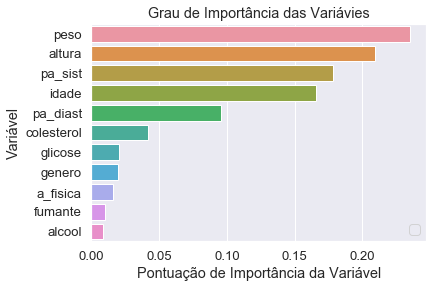

In [39]:
# Visualizando graficamente
sns.barplot(x=importancia_variaveis, y=importancia_variaveis.index)
plt.xlabel('Pontuação de Importância da Variável')
plt.ylabel('Variável')
plt.title("Grau de Importância das Variávies")
plt.legend()
plt.show()

In [40]:
# Refinando o modelo utilizando apenas as variáveis relevantes:#

nomes_variaveis_relevantes = ['peso', 'altura', 'pa_sist', 'idade', 'pa_diast', 'colesterol', 'glicose',
                             'genero', 'a_fisica', 'fumante']

# Especificando novas variáveis Independetes (X) e Dependentes (Y):

X = dados_num[nomes_variaveis_relevantes]
Y = dados_target

# Outra divisão da base de dados em Treinamento e Teste:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3) 


In [41]:
# Criando um Classificador Gaussiano:

clf = RandomForestClassifier(n_estimators=100)

# Treinando o modelo com a base de dados

clf.fit(X_train, Y_train)

Y_previsto_apurado = clf.predict(X_test)

In [42]:
# Checando a precisão:

print('Precisão:', metrics.accuracy_score(Y_test, Y_previsto_apurado)*100, '%')

Precisão: 70.88828549262995 %


<h2> Referências </h2>

https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

[Paradinha das pressões](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

https://www.paho.org/pt/topicos/doencas-cardiovasculares

https://drauziovarella.uol.com.br/doencas-e-sintomas/endocardite/#:~:text=Endocardite%20%C3%A9%20uma%20doen%C3%A7a%20que,cora%C3%A7%C3%A3o%20e%20as%20v%C3%A1lvulas%20card%C3%ADacas.

https://www.maxwell.vrac.puc-rio.br/7587/7587_4.PDF

http://professorluizalberto.com.br/site/images/2020-1/Python%20%C3%81rvore%20de%20Decis%C3%A3o.pdf